# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

# 2. Import Data from online URL

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# The iris data doesn't have headers, so add them manually
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, header=None, names=column_names)

# 3. Preprocess / EDA / IDA

In [3]:
print(df.head())
print(df['class'].value_counts())

# Use only two features for visualization
X = df[['sepal_length', 'sepal_width']].values
y = df['class'].values

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# 4. Train-Test Split (80% Train / 20% Test)

In [4]:
# 4. Train-Test Split (80% Train / 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Execute / Feature Scaling inside pipeline

# 6. Define classifiers

In [5]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# 7. Testing and 8. Predict + Visualize decision boundaries

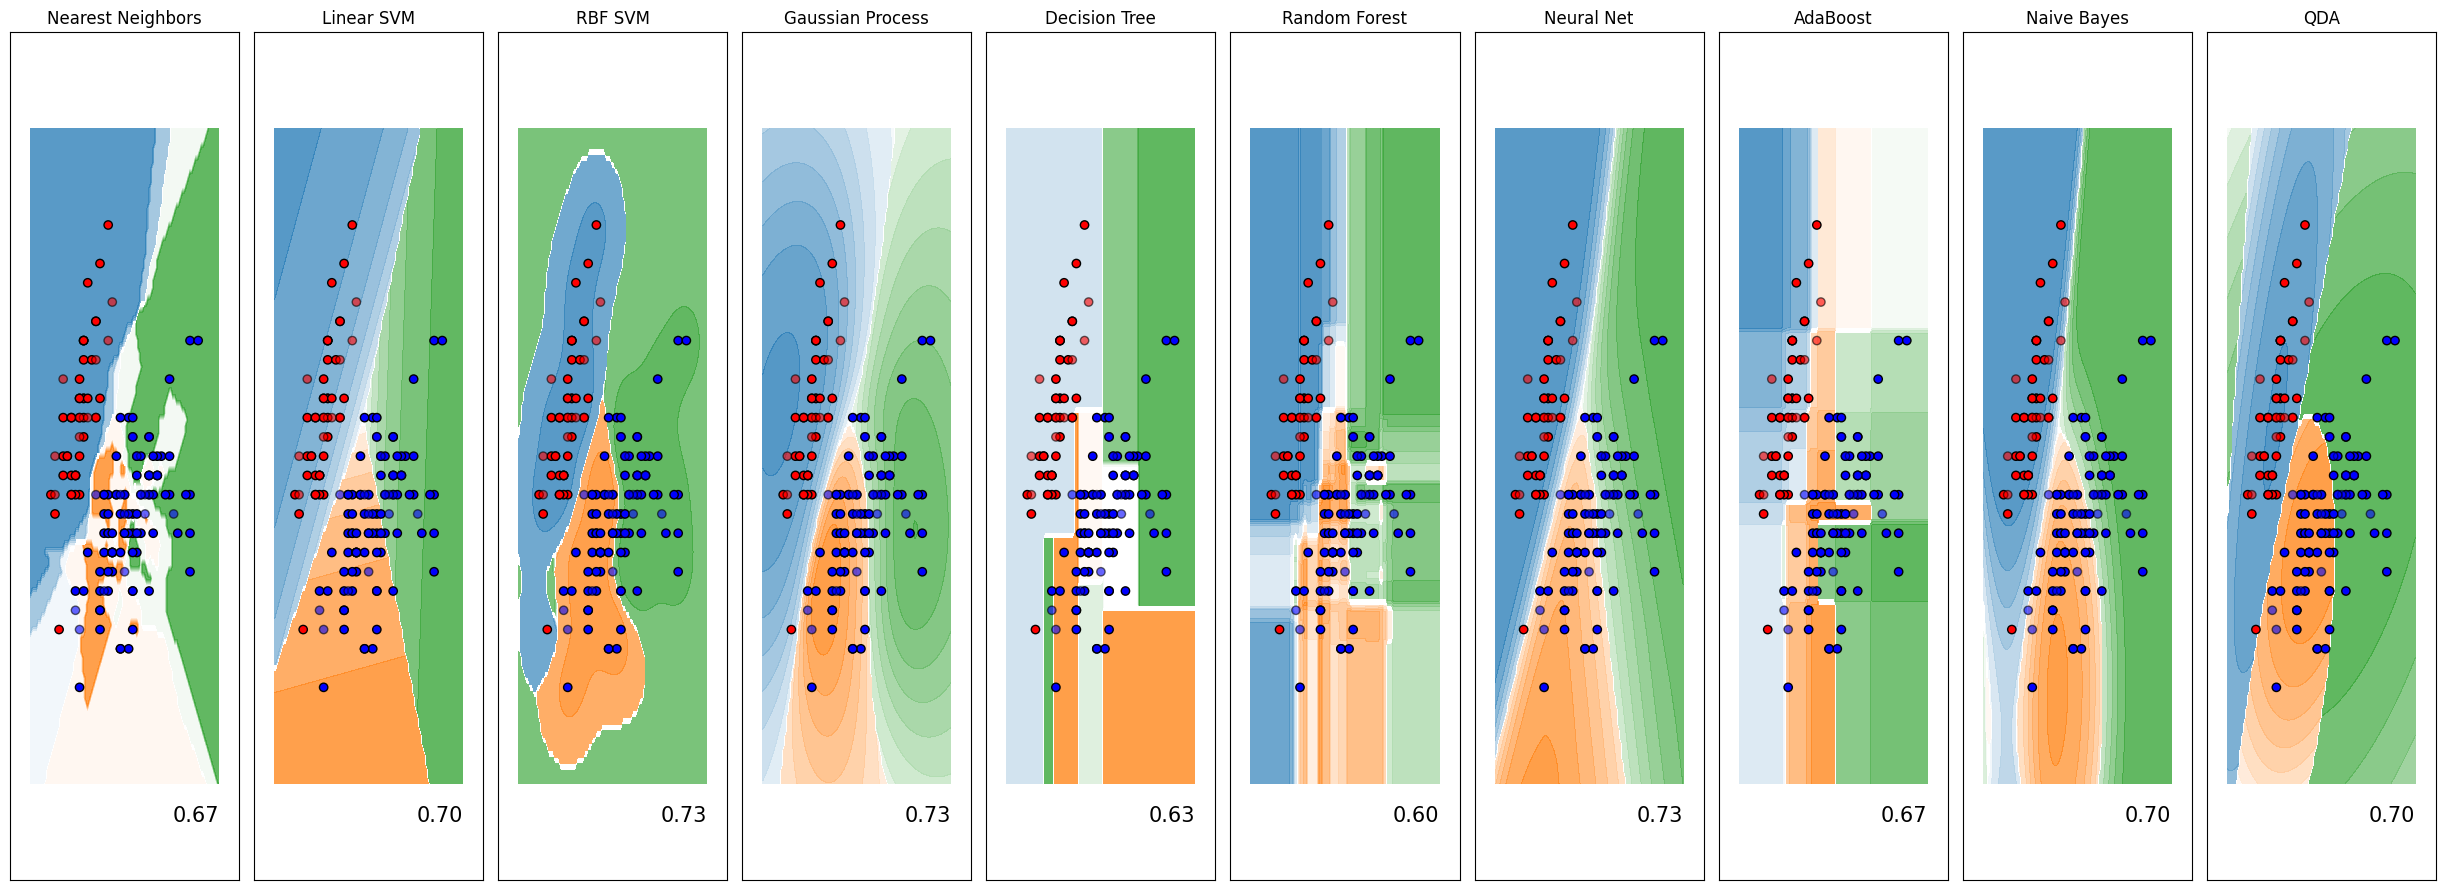

In [6]:
figure = plt.figure(figsize=(27, 9))
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot input data
for i, (name, clf) in enumerate(zip(names, classifiers), start=2):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf_pipeline = make_pipeline(StandardScaler(), clf)
    clf_pipeline.fit(X_train, y_train)
    score = clf_pipeline.score(X_test, y_test)

    DecisionBoundaryDisplay.from_estimator(
        clf_pipeline, X, alpha=0.8, ax=ax, eps=0.5
    )

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)

    ax.text(
        x_max - 0.5,
        y_min + 0.3,
        f"{score:.2f}",
        size=15,
        horizontalalignment="right",
    )

plt.tight_layout()
plt.show()